In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
N = 240
V = 441
x1 = 21
x2 = 21
num_sources = 6


# Question 1 Part 1

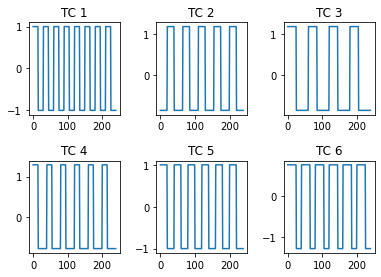

In [48]:
# declare the vectors
AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
dur_of_ones = [15, 20, 25, 15, 20, 25]

# create empty TC
TC = np.zeros((240, 6))

# create the six temporal sources
for av, iv, ones, column in zip(AV, IV, dur_of_ones, TC.T):
    while(av < 240):
        stop_one = av + ones
        column[av:stop_one] = 1
        av = av + iv
    

# standardise the temporal source
for i in range(0, 6):
    TC.T[i] = (TC.T[i] - TC.T[i].mean())/TC.T[i].std()
        
    
# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)

# draw the 6 subplots of SM
for n in range(0, 6):
    if (n < 3):
        ax[0, n].plot(TC.T[n])
        ax[0, n].set_title('TC ' + str(n+1))
    else:
        ax[1, n-3].plot(TC.T[n])
        ax[1, n-3].set_title('TC ' + str(n+1))

    
plt.show()
fig.savefig('./plots/question_1a')


# Question 1 Part 3

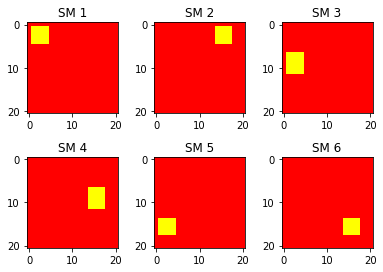

In [75]:
# create the tmpSM array as required
count = 6
tmpSM = np.zeros((count, 21, 21))

tmpSM[0][1:5, 1:5] = 1
tmpSM[1][1:5, 14:18] = 1
tmpSM[2][7:12, 1:5] = 1
tmpSM[3][7:12, 14:18] = 1
tmpSM[4][14:18, 1:5] = 1
tmpSM[5][14:18, 14:18] = 1

# making subplots
fig, ax = plt.subplots(2, 3)

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

# draw the 6 subplots of SM
for n in range(0, count): 
    if (n < 3):
        ax[0, n].imshow(tmpSM[n], cmap='autumn')
        ax[0, n].set_title('SM ' + str(n+1))
    else:
        ax[1, n-3].imshow(tmpSM[n], cmap='autumn')
        ax[1, n-3].set_title('SM ' + str(n+1))

    
plt.show()
fig.savefig('./plots/question_1c')


# creat 6x441 SM from tmpSM
SM = tmpSM.reshape(6,441)
